In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/sales_training_data.xlsx")
df.head()


,Date,Product,Units,Price
0,2025-01-01,Laptop,2,50000
1,2025-01-02,Mobile,3,20000
2,2025-01-03,Tablet,4,15000
3,2025-01-04,Laptop,1,50000
4,2025-01-05,Mobile,5,20000


In [3]:
print(df.shape)
print(df.columns)
print(df.dtypes)

(30, 4)
Index(['Date', 'Product', 'Units', 'Price'], dtype='object')
Date       object
Product    object
Units       int64
Price       int64
dtype: object


In [4]:
df.head()

,Date,Product,Units,Price
0,2025-01-01,Laptop,2,50000
1,2025-01-02,Mobile,3,20000
2,2025-01-03,Tablet,4,15000
3,2025-01-04,Laptop,1,50000
4,2025-01-05,Mobile,5,20000


In [5]:
df.describe()

,Units,Price
count,30.000000,30.000000
mean,2.900000,28333.333333
std,1.348051,15720.255621
min,1.000000,15000.000000
25%,2.000000,15000.000000
50%,3.000000,20000.000000
75%,4.000000,50000.000000
max,5.000000,50000.000000


# Numpy

In [6]:
units = np.array(df["Units"])
price = np.array(df["Price"])

print(units)
print(price)

[2 3 4 1 5 2 3 2 1 4 3 5 2 1 3 5 4 2 1 2 4 3 5 1 2 3 5 4 2 3]
[50000 20000 15000 50000 20000 15000 50000 20000 15000 50000 20000 15000
 50000 20000 15000 50000 20000 15000 50000 20000 15000 50000 20000 15000
 50000 20000 15000 50000 20000 15000]


In [7]:
revenue = units * price
revenue

array([100000,  60000,  60000,  50000, 100000,  30000, 150000,  40000,
        15000, 200000,  60000,  75000, 100000,  20000,  45000, 250000,
        80000,  30000,  50000,  40000,  60000, 150000, 100000,  15000,
       100000,  60000,  75000, 200000,  40000,  45000])

In [8]:
print("Total Revenue:", np.sum(revenue))
print("Average Revenue:", np.mean(revenue))
print("Min Revenue:", np.min(revenue))
print("Max Revenue:", np.max(revenue))
print("Std Dev:", np.std(revenue))


Total Revenue: 2400000
Average Revenue: 80000.0
Min Revenue: 15000
Max Revenue: 250000
Std Dev: 57052.60730238365


In [9]:
df["Revenue"] = revenue
df.head()

,Date,Product,Units,Price,Revenue
0,2025-01-01,Laptop,2,50000,100000
1,2025-01-02,Mobile,3,20000,60000
2,2025-01-03,Tablet,4,15000,60000
3,2025-01-04,Laptop,1,50000,50000
4,2025-01-05,Mobile,5,20000,100000


In [10]:
product_summary = df.groupby("Product")["Revenue"].sum()
print(product_summary)


Product
Laptop    1350000
Mobile     600000
Tablet     450000
Name: Revenue, dtype: int64


In [11]:
df.isna()

,Date,Product,Units,Price,Revenue
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,False,False,False,False


In [14]:
df.isna().sum()

,0
Date,0
Product,0
Units,0
Price,0
Revenue,0


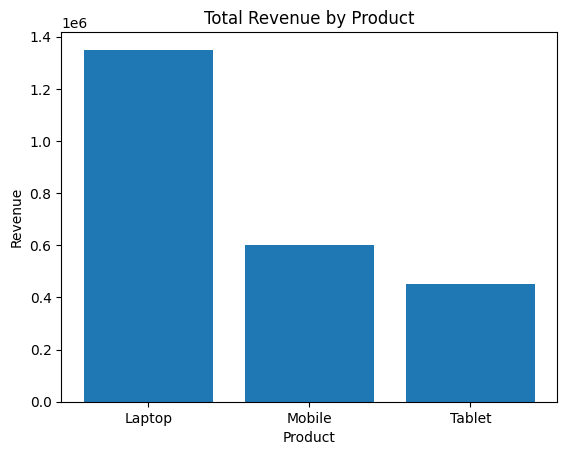

In [15]:
plt.bar(product_summary.index, product_summary.values)
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.title("Total Revenue by Product")
plt.show()

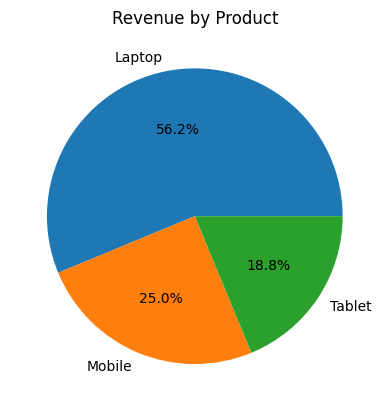

In [ ]:
# Pie chart
plt.pie(product_summary.values, labels=product_summary.index, autopct='%1.1f%%')
plt.title("Revenue by Product")
plt.show()

In [17]:
df['Date'] = pd.to_datetime(df['Date'])
print("DataFrame after converting 'Date' to datetime:")
print(df.head())
print("\nDataFrame Info:")
df.info()

DataFrame after converting 'Date' to datetime:
        Date Product  Units  Price  Revenue
0 2025-01-01  Laptop      2  50000   100000
1 2025-01-02  Mobile      3  20000    60000
2 2025-01-03  Tablet      4  15000    60000
3 2025-01-04  Laptop      1  50000    50000
4 2025-01-05  Mobile      5  20000   100000

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     30 non-null     datetime64[ns]
 1   Product  30 non-null     object        
 2   Units    30 non-null     int64         
 3   Price    30 non-null     int64         
 4   Revenue  30 non-null     int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 1.3+ KB


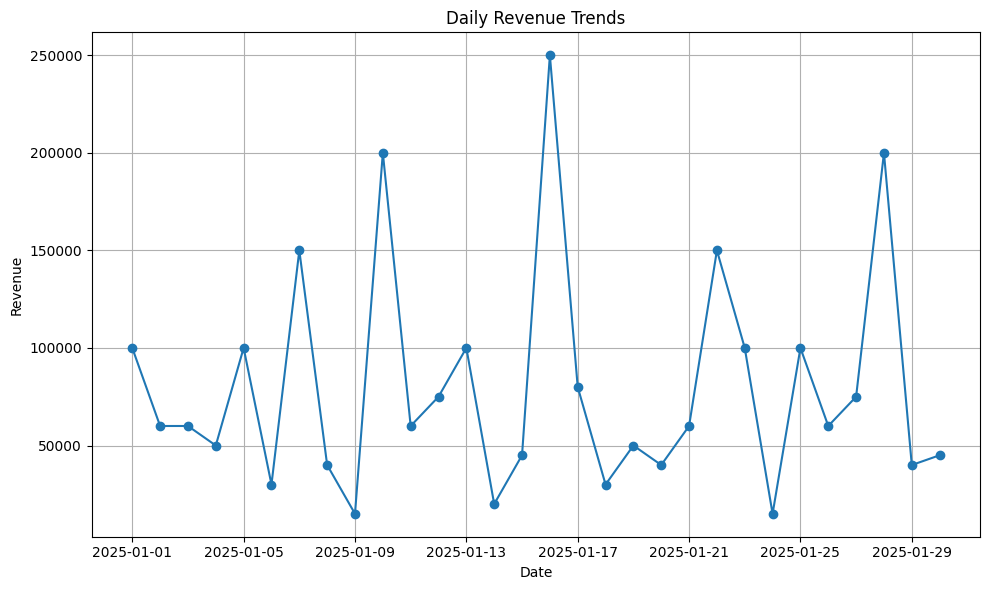

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Revenue'], marker='o')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.title('Daily Revenue Trends')
plt.grid(True)
plt.tight_layout()
plt.show()

In [21]:
units_sold_by_product = df.groupby('Product')['Units'].sum()
print(units_sold_by_product)

Product
Laptop    27
Mobile    30
Tablet    30
Name: Units, dtype: int64


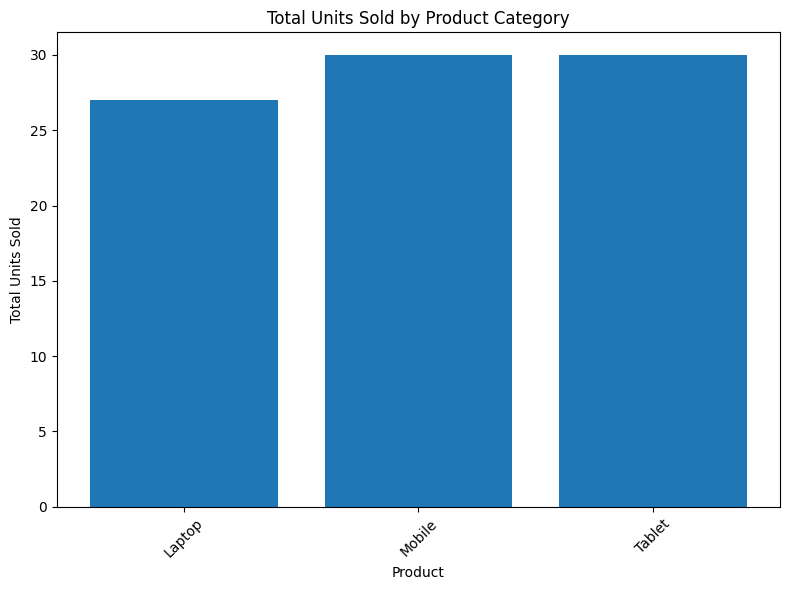

In [22]:
plt.figure(figsize=(8, 6))
plt.bar(units_sold_by_product.index, units_sold_by_product.values)
plt.xlabel('Product')
plt.ylabel('Total Units Sold')
plt.title('Total Units Sold by Product Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [23]:
df['Week'] = df['Date'].dt.isocalendar().week
print(df.head())

        Date Product  Units  Price  Revenue  Week
0 2025-01-01  Laptop      2  50000   100000     1
1 2025-01-02  Mobile      3  20000    60000     1
2 2025-01-03  Tablet      4  15000    60000     1
3 2025-01-04  Laptop      1  50000    50000     1
4 2025-01-05  Mobile      5  20000   100000     1


In [24]:
weekly_revenue = df.groupby(['Week', 'Product'])['Revenue'].sum()
print(weekly_revenue.head())

Week  Product
1     Laptop     150000
      Mobile     160000
      Tablet      60000
2     Laptop     350000
      Mobile     100000
Name: Revenue, dtype: int64


In [26]:
unique_weeks = np.sort(df['Week'].unique())
print("Unique Weeks:", unique_weeks)

Unique Weeks: [1 2 3 4 5]


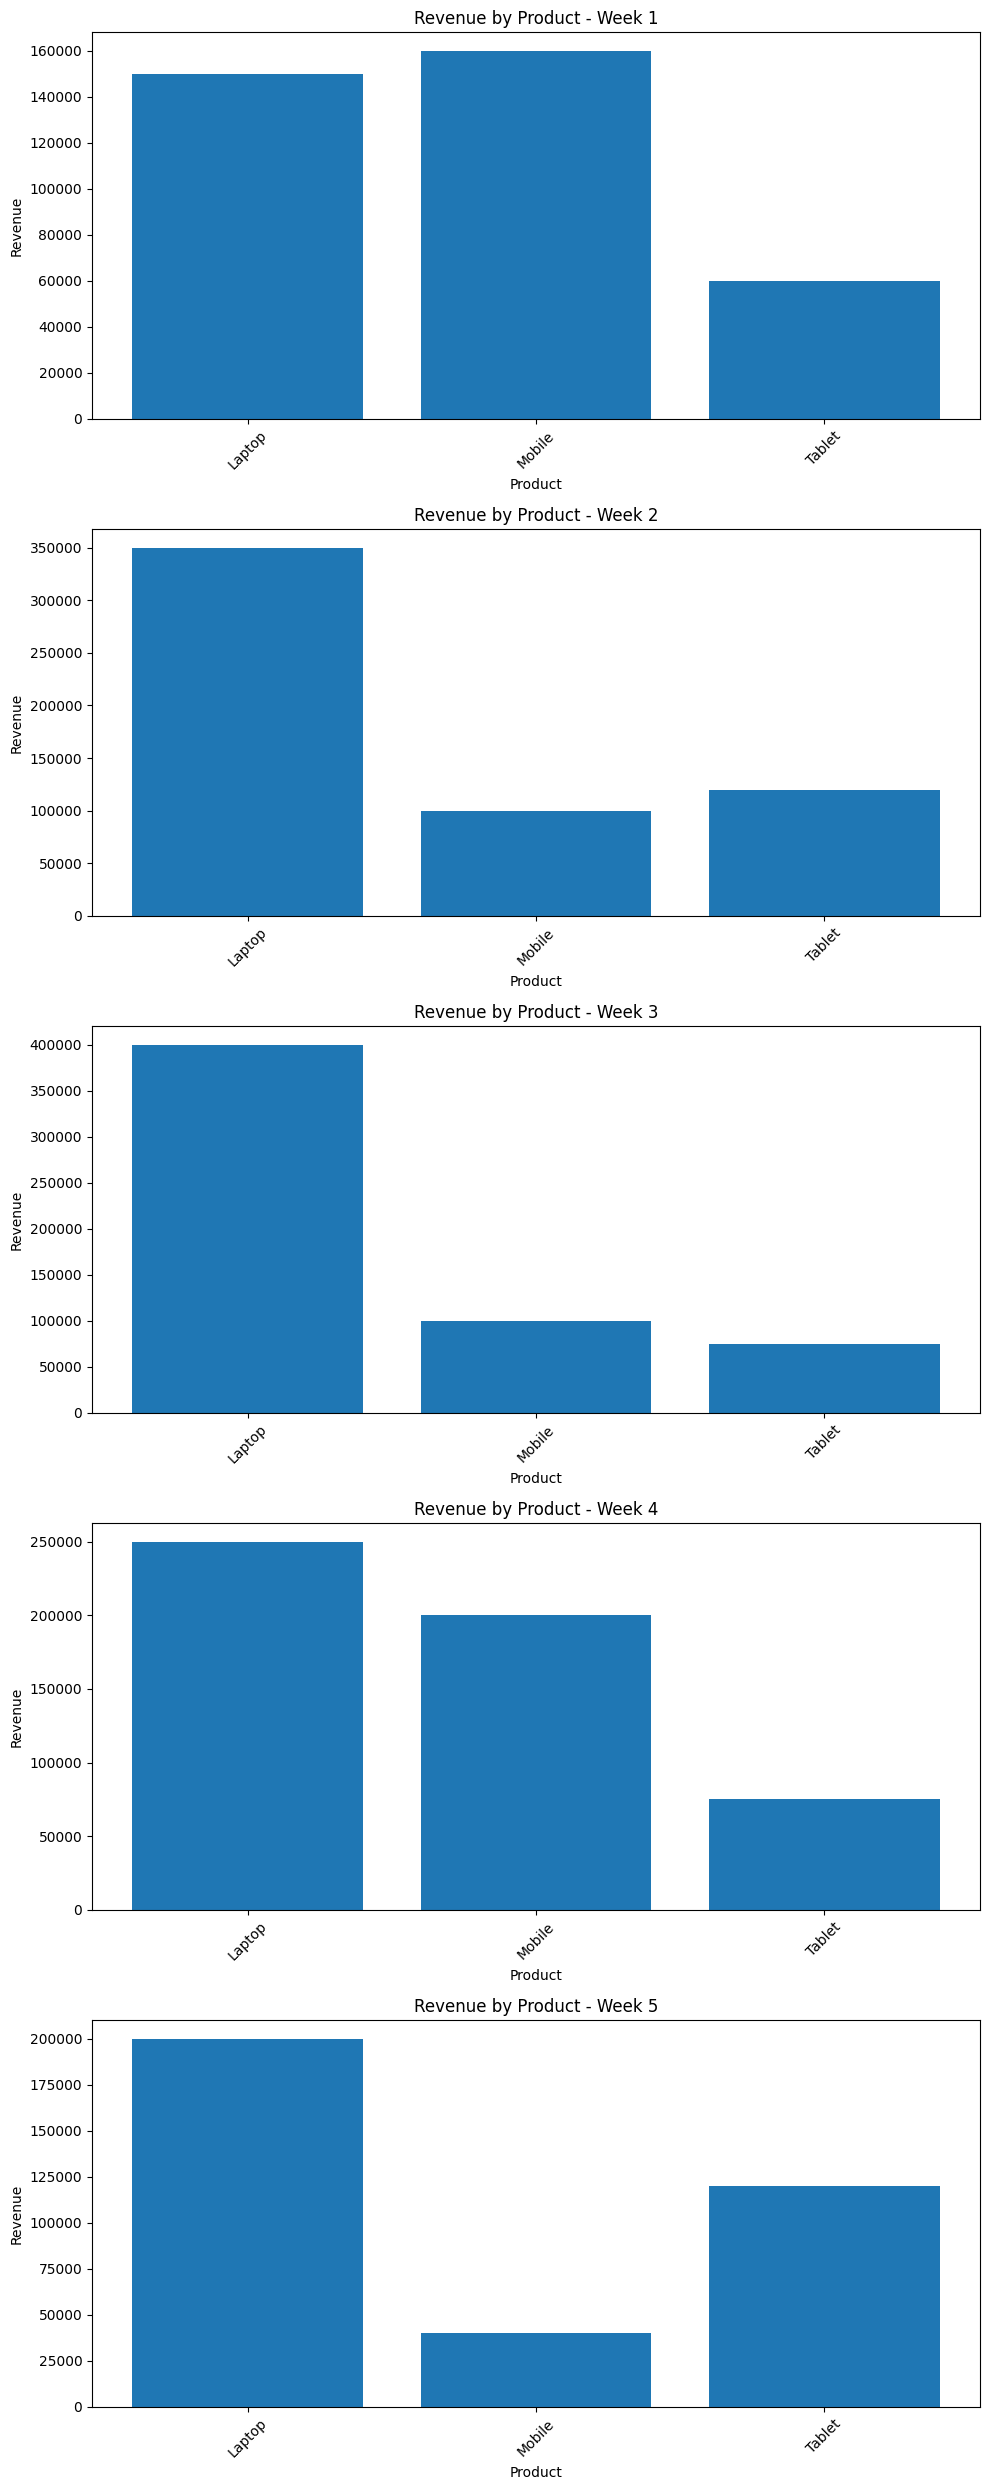

In [27]:
fig, axes = plt.subplots(nrows=len(unique_weeks), ncols=1, figsize=(10, 5 * len(unique_weeks)))

if len(unique_weeks) == 1:
    axes = [axes]

for i, week in enumerate(unique_weeks):
    week_data = weekly_revenue.loc[week]
    axes[i].bar(week_data.index, week_data.values)
    axes[i].set_xlabel('Product')
    axes[i].set_ylabel('Revenue')
    axes[i].set_title(f'Revenue by Product - Week {week}')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()
